In [16]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
from matplotlib import rcParams
import sympy as sy
import scipy.constants as pc
from sympy import *
from math import log10, floor

rcParams['font.size'] = 16
rcParams['font.weight'] = 'bold'
rcParams['text.usetex'] = True
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['errorbar.capsize'] = 3

In [2]:
# Funktionen
def am(werte):
    return np.mean(werte)

def std(werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am(werte))**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(werte):
    return std(werte)/np.sqrt(werte.size)

x = "Johann ist der beste"

def fehler(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += (dif * unsicherheiten[i])**2
    zMax = sqrt(zMax)
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def fehlerMax(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * unsicherheiten[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def groessterBeitrag(f, werte, unsicherheiten, variablen):
    zMax = 0
    zMaxArray = np.array([])
    for i in range (werte.size):
        zMax = (np.abs(sy.diff(f, variablen[i])) * unsicherheiten[i])
        for j in range(werte.size):
            zMax = sub(zMax, variablen[j], werte[j])
        x = np.array([zMax])
        zMaxArray = np.append(zMaxArray, x)
    return variablen[np.argmax(zMaxArray)]

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

def einfachGaussAdd(unsicherheiten, koeffizienten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (unsicherheiten[i]*unsicherheiten[i])**2
    return sqrt(dz)

def einfachGaussMult(unsicherheiten, werte, exponenten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (exponenten[i]*unsicherheiten[i]/werte[i])**2
    return sqrt(dz)

def einfachGaussMultMax(unsicherheiten, werte, exponenten):
    max_a = 0
    num = -1
    for i in range (unsicherheiten.size):
        maxi = (exponenten[i]*unsicherheiten[i]/werte[i])**2
        if max_a <= maxi:
            max_a = maxi
            num = i
    return (max_a, num)

def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

def bestA(x, y):
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(x.size*sum(x**2)-sum(x)**2)

def bestB(x, y):
    return (x.size*sum(x*y)-sum(x)*sum(y))/(x.size*sum(x**2)-sum(x)**2)

def streuung(x, y):
    s = 0
    for i in range(x.size):
        s += (y[i]-(bestA(x, y)+bestB(x, y)*x[i]))**2
    return np.sqrt(s/(x.size-2))

def stuA(x, y):
    s = streuung(x, y)
    return s*np.sqrt(sum(x**2)/((x.size*sum(x**2)-sum(x)**2)))

def stuB(x, y):
    s = streuung(x, y)
    return s*np.sqrt(x.size/((x.size*sum(x**2)-sum(x)**2)))

def round_to_j(x,j):
    return round(x, (j-1)-int(floor(log10(abs(x)))))

def print_to_table(avgs, stds, rows, cols,
                   highlight_best=True,
                   max_is_best=True,
                   avg_format='{0:!>4.1f}',
                   std_format='{1:!<4.1f}',
                   file=None,
                   col_orientation='c'):
    # Find best values
    best_avg = {}
    if highlight_best:
        if max_is_best:
            for c in cols:
                idx = np.argmax(avgs[c], axis=0)
                best_avg[c] = idx
        else:
            for c in cols:
                idx = np.argmin(avgs[c], axis=0)
                best_avg[c] = idx

    # Header
    print_str = '\\begin{tabular}{l' + (" "+col_orientation) * len(cols) + '} \hline\n'
    for c in cols:
        print_str += ' & ' + c
    print_str += ' \\\\ \n \hline'

    # Content
    for m in range(len(rows)):
        row_name = rows[m]
        print_str += '\n{0}'.format(row_name)
        for c in cols:
            print_str += ' &\n '
            print_list = [avgs[c][m]]
            print_list += [stds[c][m]]
            if m == best_avg.get(c, None):
                print_str += ('$\mathbf{{'+ avg_format + ' \\pm ' + std_format + '}}$').format(*print_list)
            else:
                print_str += ('$'+ avg_format + ' \\pm ' + std_format + '$').format(*print_list)

        print_str += "\n \\vspace*{0.0mm} \\\\"
        print_str = print_str.replace('!', '\\phantom{0}')

    # Footer
    print_str += '\n \hline \n \end{tabular}'

    # Write output
    if file is None:
        print(print_str)
    else:
        with open(file, 'w') as f:
            f.write(print_str)

In [3]:
# Erinnerungen
# x = np.array([,])
# x.size
# x, y = symbols('x y')
# expr = x*y
# expr.subs([(x, wert_x), (y, wert_y)])

In [4]:
# Einzelmessungen
gew = np.array([0, 10, 20, 30, 40, 50])
f_gew = 0.1
auslenk =  abs(np.array([365, 311, 259, 208, 150, 103])-365)
f_auslenk = 1

1.8616052060737525



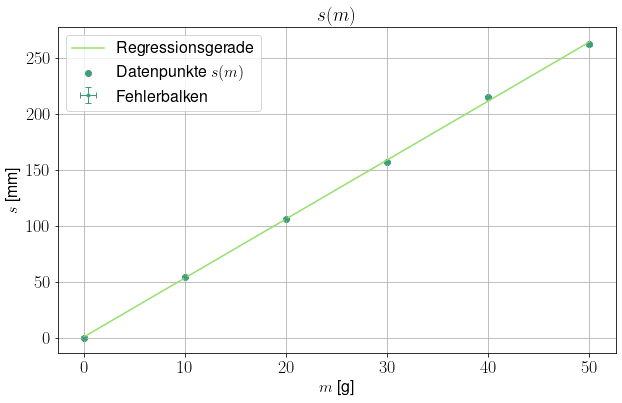

In [115]:
fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=16)

ax.scatter(gew, auslenk, color='#419D78', label=r'Datenpunkte $s(m)$')
ax.errorbar(gew, auslenk, xerr=f_gew, yerr=f_auslenk, fmt='.', elinewidth=1, color='#419D78', label='Fehlerbalken')

x = np.linspace(gew[0], gew[5], 20)

a, b, us_a, us_b = bestA(gew, auslenk), bestB(gew, auslenk), stuA(gew, auslenk), stuB(gew, auslenk)

ax.plot(x, x*b+a, color='#95E06C', label='Regressionsgerade')


ax.set(xlabel=r'$m$ [g]', ylabel=r'$s$ [mm]', title=r'$s(m)$')
ax.legend()
ax.grid()

fig.savefig("calfed.svg")

print((1/b)*9.808) 
#print(1/us_b)

einfachGaussMult(np.array([0.001, us_b]), np.array([9.808, b]),np.array([1,-1]))

print()

In [62]:
# Messung 
ruhe = np.array([2.3, 48.6])
klaenge = np.linspace(0, 800, 17)+107+5
us_klaenge = 1
xL = np.array([3.2, 3.6, 4.0, 4.3, 4.6, 4.9, 5.1, 5.4, 5.7, 5.8, 6.0, 6.3, 6.3, 6.4, 6.5, 6.6, 6.7])-3.2
xR = np.array([47.8, 47.3, 47.0, 46.7, 46.4, 46.1, 45.7, 45.5, 
               45.3, 45.1, 44.9, 44.7, 44.6, 44.6, 44.4, 44.4, 44.3])-47.8
us_x = 0.1
# gewicht 9.92

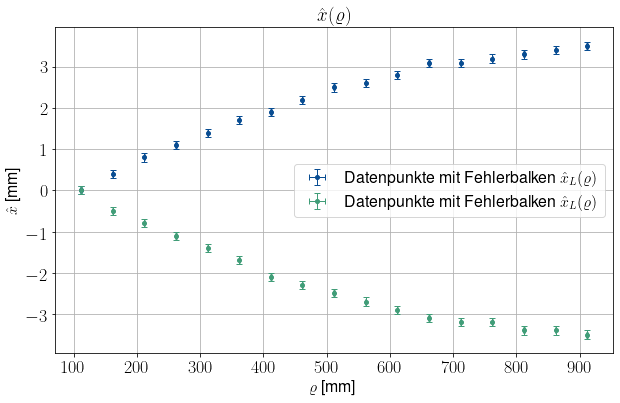

In [120]:
fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=16)

ax.errorbar(klaenge, xL, xerr=us_klaenge, yerr=us_x, fmt='o',
            elinewidth=1, color='#094D92', ms=4, label=r'Datenpunkte mit Fehlerbalken $\hat{x}_L(\varrho)$')

ax.errorbar(klaenge, xR, xerr=us_klaenge, yerr=us_x, fmt='o', ms=4, elinewidth=1, color='#419D78', 
            label=r'Datenpunkte mit Fehlerbalken $\hat{x}_L(\varrho)$')

ax.set(xlabel=r'$\varrho$ [mm]', ylabel=r'$\hat{x}$ [mm]', title=r'$\hat{x}(\varrho)$')
ax.legend()
ax.grid()

fig.savefig("x(rho).svg")

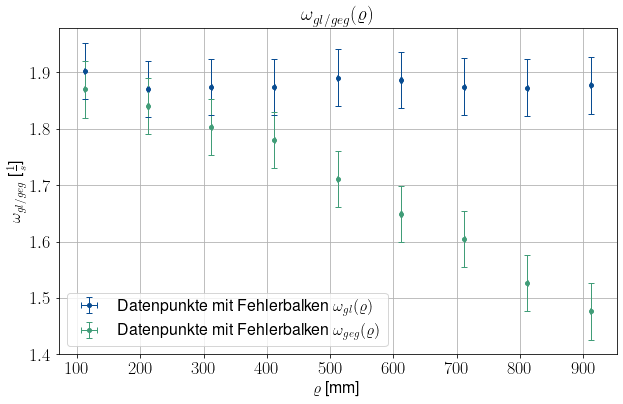

In [109]:
klaengeg = np.linspace(0, 800, 9)+107+5

pTg = np.array([19.02, 18.71, 18.74, 18.74, 18.91, 18.87, 18.75, 18.73, 18.77])/10
us_p = 0.05
#d = np.array([3.2, 3.9, 6.3, 2.75, 4.9, 4.3, 4.3, 3.3, 3.9])
pTe = np.array([18.7, 18.41, 18.03, 17.80, 17.11, 16.49, 16.05, 15.27, 14.76])/10

fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=16)

ax.errorbar(klaengeg, pTg, xerr=us_klaenge, yerr=us_p, fmt='o',
            elinewidth=1, color='#094D92', ms=4, label=r'Datenpunkte mit Fehlerbalken $\omega_{gl}(\varrho)$')

ax.errorbar(klaengeg, pTe, xerr=us_klaenge, yerr=us_p, fmt='o',
            elinewidth=1, color='#419D78', ms=4, label=r'Datenpunkte mit Fehlerbalken $\omega_{geg}(\varrho)$')

ax.set(xlabel=r'$\varrho$ [mm]', ylabel=r'$\omega_{gl/geg}$ [$\frac{1}{s}$]', 
       title=r'$\omega_{gl/geg}(\varrho)$')
ax.legend()
ax.grid()

fig.savefig("omgleich.svg")

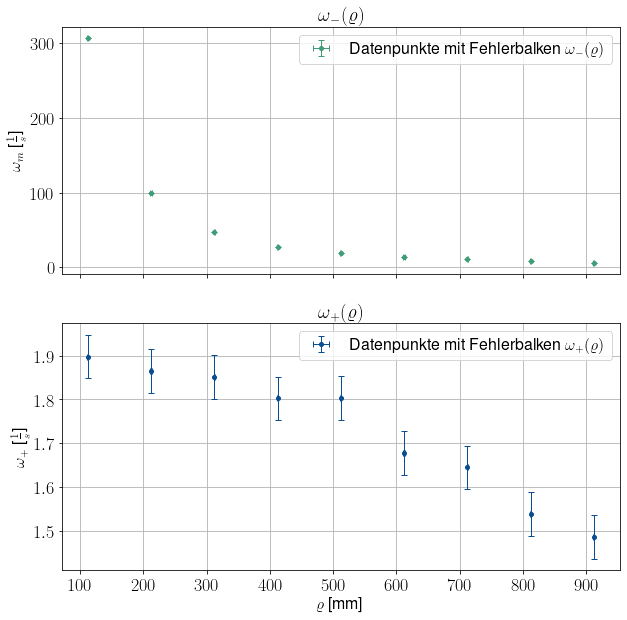

In [133]:
#Kopplungs
pTp = np.array([14.86/10, 15.39/10, 16.45/10, 16.79/10, 18.04/10, 16.22/9, 16.66/9, 16.79/9, 17.08/9])
pTm = np.array([12.3 * 0.5, 15.89 * 0.5, 21.20 * 0.5, 28.17*0.5, 18.94, 26.86, 23.45 * 2, 49.71 * 2, 76.78 * 4]) #in einer Periode


fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,10))

ax0.tick_params(axis='both', which='major', labelsize=18)
ax0.tick_params(axis='both', which='minor', labelsize=16)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=16)

ax0.errorbar(np.flip(klaengeg), pTm, xerr=us_klaenge, yerr=us_p, fmt='o',
            elinewidth=1, color='#419D78', ms=4, label=r'Datenpunkte mit Fehlerbalken $\omega_{-}(\varrho)$')

ax0.set(ylabel=r'$\omega_{m}$ [$\frac{1}{s}$]', 
       title=r'$\omega_{-}(\varrho)$')

ax1.errorbar(np.flip(klaengeg), pTp, xerr=us_klaenge, yerr=us_p, fmt='o',
            elinewidth=1, color='#094D92', ms=4, label=r'Datenpunkte mit Fehlerbalken $\omega_{+}(\varrho)$')

ax1.set(xlabel=r'$\varrho$ [mm]', ylabel=r'$\omega_{+}$ [$\frac{1}{s}$]', 
       title=r'$\omega_{+}(\varrho)$')


ax0.legend()
ax0.grid()

ax1.legend()
ax1.grid()

fig.savefig("omkoppp.svg")